# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import your libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from html import escape
from random import randint
from IPython.display import display, display_html
from sklearn import set_config
from sklearn.base import BaseEstimator
from sklearn.naive_bayes import MultinomialNB

%config InlineBackend.figure_formats = ['svg']
set_config(display='diagram')

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [3]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')

df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,Shirt,0,0,0,0,0,0,0,1,0,...,126,102,0,0,0,0,0,0,0,0
5998,T-shirt/top,0,0,1,0,0,0,0,0,0,...,89,91,96,0,0,2,0,0,0,0


### Inspect for null values

In [4]:
# 2. Inspect / remove null values. 
# Counts non-null values by row, then sums up the number of rows with less than the DataFrame column count.
display_html('<strong>Rows with nulls:</strong> '
            f'{(df.apply(pd.Series.count, axis=1) < df.columns.size).sum():,}',
             raw=True)
df.dropna(inplace=True)

Rows with nulls: 0

### Check for duplicates

In [5]:
# 3. Inspect / remove duplicate rows. 
display_html('<strong>Duplicate rows:</strong> '
            f'{df.duplicated().sum():,}',
             raw=True)
df.drop_duplicates(inplace=True)

Duplicate rows: 0

### Lets look at our class balances

In [6]:
# 4. Print out the number examples in each class aka the class balances. 
pd.DataFrame({'Counts': df.label.value_counts(),
              'Percentages': df.label.value_counts(normalize=True)}) \
  .style.format({'Counts': '{:,}',
                 'Percentages': '{:.2%}'})

,Counts,Percentages
Sandal,646,10.77%
Trouser,612,10.20%
Ankle boot,605,10.08%
Shirt,601,10.02%
Pullover,598,9.97%
Coat,597,9.95%
T-shirt/top,590,9.83%
Dress,585,9.75%
Bag,584,9.73%
Sneaker,582,9.70%


# Visualize one image

## First, we need to create a list that is just our pixel columns

In [7]:
pixel_columns = [column for column in df.columns if column != 'label']
display_html(f'<code>pixel_columns</code> is a <code>{type(pixel_columns).__name__}</code> '
             f'with <em>{len(pixel_columns):,}</em> elements.',
             raw=True)

pixel_columns is a list with 784 elements.

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

images is a ndarray with 6,000 elements.

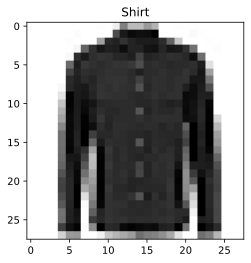

In [8]:
def show_random_image():
    # Select just the pixel columns and convert them to a numpy array by using .values. 
    images = df[pixel_columns].values
    display_html(f'<code>images</code> is a <code>{type(images).__name__}</code> '
                f'with <em>{len(images):,}</em> elements.',
                raw=True)

    # Select just one image from all the images
    # Reshape the image to be a 28x28 matrix (original format of image)
    index = randint(0, len(images) - 1)
    image = (255 - images[index]).reshape(28,28)

    # Plot reshaped image
    plt.title(df.label[index])
    plt.imshow(image,
               cmap='gray')

show_random_image()

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [9]:
# DOING THIS AGAIN JUST FOR PRACTICE 

selected_features = [column for column in df.columns if column != 'label']

# Sanity check that it is now just a list.
display_html(f'<code>selected_features</code> is a <code>{type(selected_features).__name__}</code> '
             f'with <em>{len(selected_features):,}</em> elements.',
             raw=True)

selected_features is a list with 784 elements.

### 2. Define our `X` and `y`

In [10]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]
y = df['label']

### 3. Train-test-split our `X` and `y` data

In [11]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [12]:
# Initalize our Support Vector Classifier
model = SVC()

In [13]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train);

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [14]:
### 1. Get and print a baseline accuracy score.
display_html(f'<strong>Accuracy:</strong> {model.score(X_test, y_test):.2f}', raw=True)

Accuracy: 0.84

### 2. Make new predictions using our test data. 

In [15]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [16]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Ankle boot       0.89      0.90      0.90       122
         Bag       0.94      0.97      0.95       121
        Coat       0.75      0.83      0.79       115
       Dress       0.83      0.92      0.87       120
    Pullover       0.79      0.72      0.76       133
      Sandal       0.93      0.91      0.92       140
       Shirt       0.65      0.55      0.59       121
     Sneaker       0.85      0.88      0.87       117
 T-shirt/top       0.77      0.82      0.79       113
     Trouser       1.00      0.92      0.96        98

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200



### 4. Plot the confusion matrix of our predicted results. 

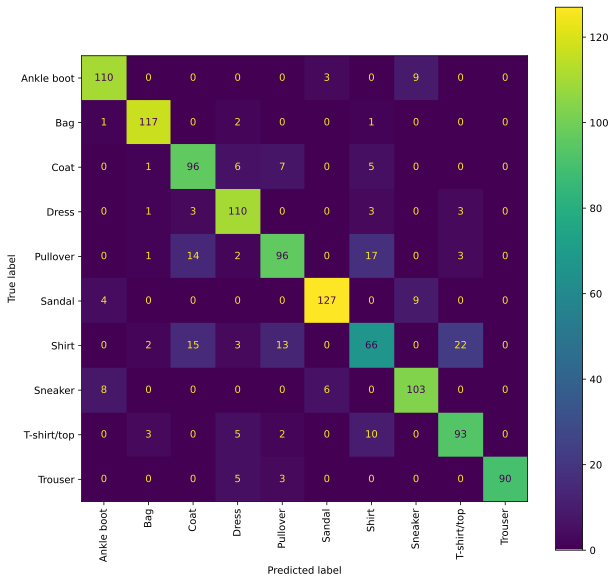

In [17]:
### 4. Plot the confusion matrix of our predicted results.
metrics.plot_confusion_matrix(model, X_test, y_test, xticks_rotation=90, ax=plt.subplots(figsize=(10, 10))[1]);

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [18]:
print('The classifier mistook pullovers for shirts most, followed by coats for shirts.',
      'Looking at actual pictures of pullovers on Google, it’s obvious that the shapes are all too similar.')

The classifier mistook pullovers for shirts most, followed by coats for shirts. Looking at actual pictures of pullovers on Google, it’s obvious that the shapes are all too similar.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [19]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    display_html(f'Running report for model:', raw=True)
    display(model)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
    model.fit(X_train, y_train)
    display_html(f'<strong>Accuracy:</strong> {model.score(X_test, y_test):.2f}', raw=True)

    y_pred = model.predict(X_test)
    display_html('<strong>Classification report:</strong>'
                f'<pre>{escape(metrics.classification_report(y_test, y_pred))}</pre>',
                 raw=True)
    metrics.plot_confusion_matrix(model,
                                  X_test,
                                  y_test,
                                  xticks_rotation=90,
                                  ax=plt.subplots(figsize=(10, 10))[1])

    return model

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

Running report for model:

LogisticRegression(solver='saga')

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy: 0.83

Classification report: precision recall f1-score support

 Ankle boot 0.91 0.95 0.93 122
 Bag 0.94 0.93 0.93 121
 Coat 0.74 0.77 0.75 115
 Dress 0.84 0.85 0.84 120
 Pullover 0.79 0.74 0.76 133
 Sandal 0.95 0.89 0.92 140
 Shirt 0.57 0.56 0.56 121
 Sneaker 0.87 0.88 0.88 117
 T-shirt/top 0.76 0.80 0.78 113
 Trouser 0.94 0.94 0.94 98

 accuracy 0.83 1200
 macro avg 0.83 0.83 0.83 1200
weighted avg 0.83 0.83 0.83 1200

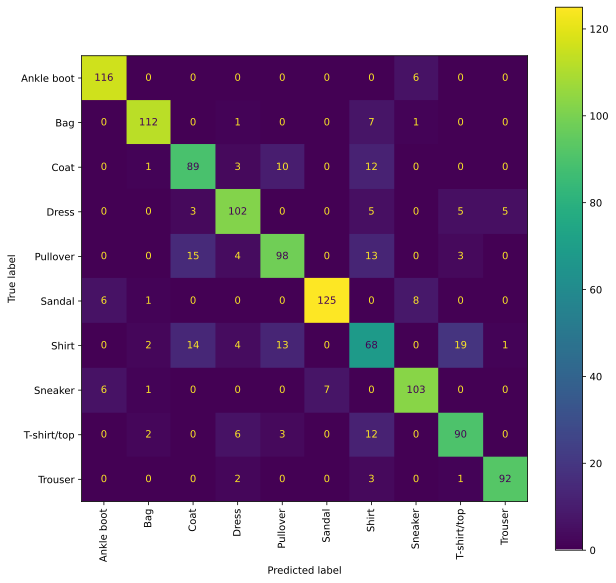

In [20]:
# LogisticRegression
build_and_eval_model(LogisticRegression(solver='saga'), X, y);

Running report for model:

RandomForestClassifier(random_state=0)

Accuracy: 0.84

Classification report: precision recall f1-score support

 Ankle boot 0.93 0.91 0.92 122
 Bag 0.90 0.96 0.93 121
 Coat 0.70 0.80 0.74 115
 Dress 0.81 0.93 0.86 120
 Pullover 0.80 0.74 0.77 133
 Sandal 0.96 0.92 0.94 140
 Shirt 0.66 0.52 0.58 121
 Sneaker 0.87 0.91 0.89 117
 T-shirt/top 0.81 0.79 0.80 113
 Trouser 0.99 0.94 0.96 98

 accuracy 0.84 1200
 macro avg 0.84 0.84 0.84 1200
weighted avg 0.84 0.84 0.84 1200

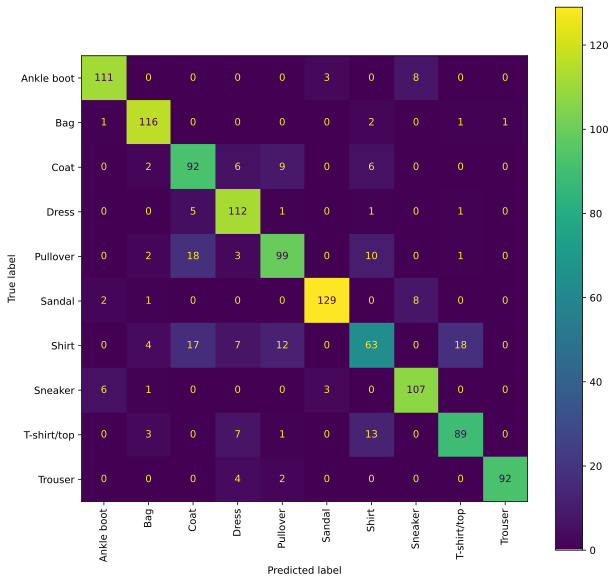

In [21]:
# RandomForest
build_and_eval_model(RandomForestClassifier(random_state=0), X, y);

Running report for model:

MultinomialNB()

Accuracy: 0.64

Classification report: precision recall f1-score support

 Ankle boot 0.69 0.85 0.76 122
 Bag 0.88 0.85 0.87 121
 Coat 0.42 0.55 0.47 115
 Dress 0.67 0.90 0.77 120
 Pullover 0.65 0.60 0.62 133
 Sandal 0.79 0.08 0.14 140
 Shirt 0.33 0.14 0.20 121
 Sneaker 0.51 0.93 0.66 117
 T-shirt/top 0.73 0.81 0.76 113
 Trouser 0.96 0.89 0.92 98

 accuracy 0.64 1200
 macro avg 0.66 0.66 0.62 1200
weighted avg 0.66 0.64 0.60 1200

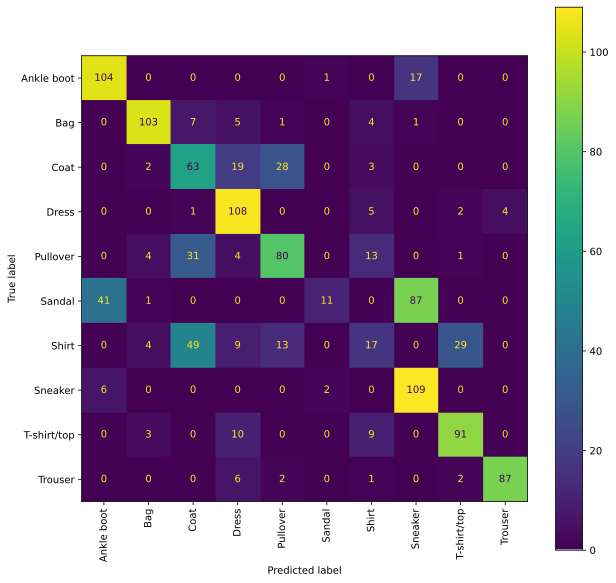

In [22]:
# MultinomialNB
build_and_eval_model(MultinomialNB(), X, y);

In [23]:
print('The SVC model did the best and the MultinomialNB model did the worst. '
      'The RandomForestClassifier model was not far behind.')

The SVC model did the best and the MultinomialNB model did the worst. The RandomForestClassifier model was not far behind.
